# The Riddler ☕ Coffee Challenge ☕ 

Below is the analysis behind my strategy in the [2017-06-23 Riddler](https://fivethirtyeight.com/features/can-you-drink-more-coffee-than-your-coworkers/). A quick recap of the rules:

> [T]he coffee pot holds one gallon of coffee, and workers fill their mugs from it in sequence. Whoever takes the last drop has to make the next pot, no ifs, ands or buts. Every worker in the office is trying to take as much coffee as he or she can while minimizing the probability of having to refill the pot. Also, this pot is both incredibly heavy and completely opaque, so it’s tough to tell how much remains. That means a worker can’t keep pouring until she sees or feels just a drop left. Anyone stuck refilling the pot becomes so frustrated that they throw their cup to the ground in frustration, so they get no coffee that round.

The aim is to choose a strategy (a number of gallons to try to take from the pot) that maximises total coffee consumed.

## Nash Equilibrium

While I don't think that the game has a Nash equilibrium under the rules above, we can tweak the rules very slightly to get one. Consider a similar game, where you lose if you try to take strictly more than the remaining amount. A Nash equilibrium (probably the only one) of this game is that every player goes for 1 gallon each time.

To see that this is a Nash equilibrium, note that under this strategy, each player has a 50 % chance of getting 1 gallon. Every other strategy will make you win less coffee with the same probability.

Now you may say that this is just a theoretical excercise. Clearly, in the real world, not everyone will go for the full pot. Therefore, I have dedicated the rest of this analysis to maximising the amount of coffee when the coworkers follow a distribution of strategies.

## Simulations

First, let's define a function for simulating many rounds to the coffee pot under a set of strategies. The strategies will be given as an array of numbers between 0 and 1.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def simulate(strategies, n=10000):
    """
    Simulate `n` rounds to the coffee pot with the strategies given
    by `strategies`. Plots a histogram of strategies and total
    amount of coffee consumed per player.
    """
    num_players = len(strategies)
    gains = np.zeros(num_players)
    order = np.arange(num_players)
    
    coffee_pot = 1.0

    for i in range(1, n + 1):
        np.random.shuffle(order)
        for j in order:
            coffee_pot -= strategies[j]
            if coffee_pot > 0:
                gains[j] += strategies[j]
            else:
                coffee_pot = 1.0
        if (i % 200) == 0:
            print(f'\r{i} out of {n} completed.', end='')

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].hist(strategies, bins=20)
    ax[0].set_title('Strategies')
    ax[1].scatter(strategies, gains/n)
    ax[1].set_title('Avg coffee consumed')

First, let's confirm that the code gives the right answer for the theoretical case outlined above.

10000 out of 10000 completed.

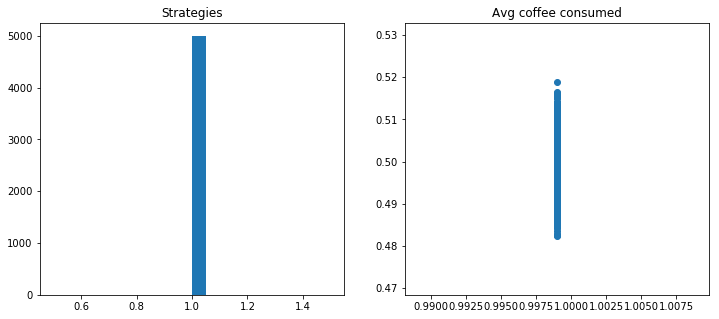

In [3]:
num_players = 5000
strategies = np.full(num_players, 0.999)
simulate(strategies)

Now we can start testing a number of different strategy distributions. Let's start with a uniform distribution.

10000 out of 10000 completed.

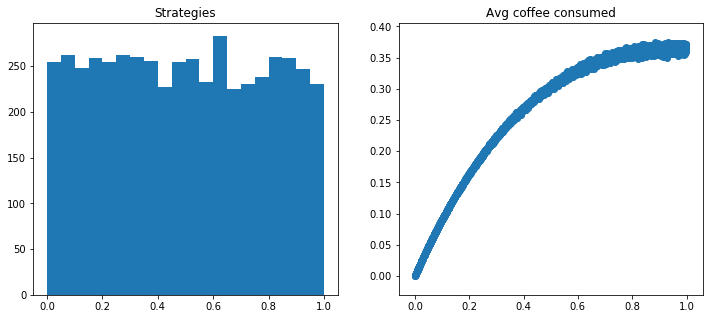

In [4]:
strategies = np.random.uniform(size=num_players)
simulate(strategies)

Here's a beta distribution with $\alpha = \beta = 3$.

10000 out of 10000 completed.

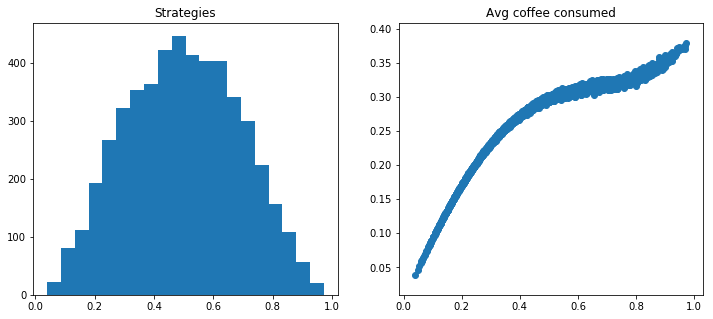

In [5]:
strategies = np.random.beta(3, 3, size=num_players)
simulate(strategies)

Let's see what happens if people decide to be cautious. Here's a beta distribution with $\alpha=5, \beta=1$. I've added a player at 0.999 for illustrative ourposes.

10000 out of 10000 completed.

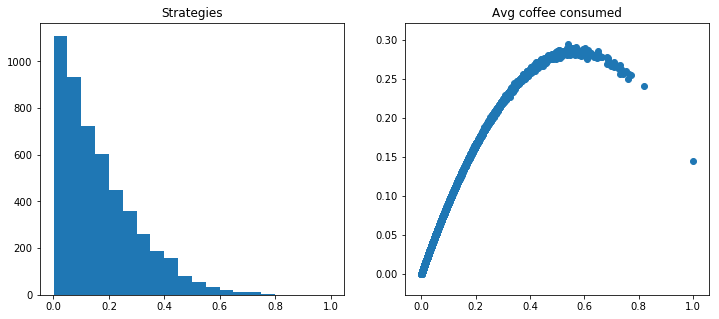

In [6]:
strategies = np.concatenate([np.random.beta(1, 5, size=num_players), [0.999]])
simulate(strategies)

At last, we've found a situation when the optimum is not to be as greedy as possible. However, this relies on a lot of players choosing a bad strategy, so I think that this distribution is unlikely to occur.

To round off, let's take a look a mixture of two beta distributions.

10000 out of 10000 completed.

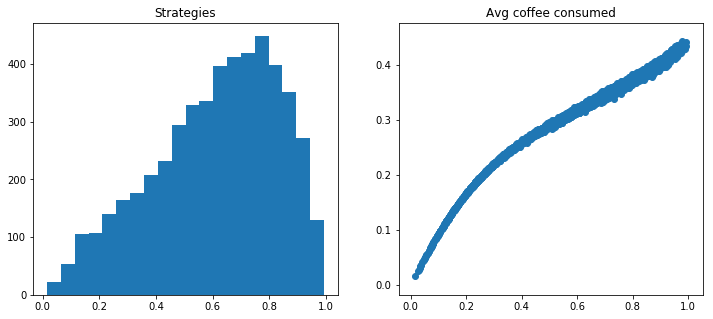

In [7]:
strategies = np.concatenate([
    np.random.beta(2, 2, size=num_players//2),
    np.random.beta(5, 2, size=num_players//2),
])
simulate(strategies)

## Conclusion

The optimal strategy should in most cases be to try to take arbitrily close to 1 gallon, in other words betting on being the first in line to a new pot.